<img src = "images/Logo.png" width = 220, align = "left">

<h1 align=center><font size = 6>Outlier Detection</font></h1>
<h2 align=center><font size = 5>Lab Exercise 3.3</font></h2>
<h3 align=center><font size = 4><b>Advanced Machine Learning<br></b><small>From Theory to Practice with NumPy and scikit-learn<br><i>Volume 1: Generalized Linear Models</i></font></h3>

## Introduction

In this exercise we check the outliers, leverages, and influential points in case of multiple linear regression. For this purpuse, first we use a small dataset with 67 observations containing 3 independent variables: number of employees, profit margin and information processing cost. The dependent variable is the salary. <br>
**Note**: *The original dataset can be found at http://pages.stern.nyu.edu/~rdeo/f97/ex1233.mtp. The following article was also used in creating this exercise: http://people.stern.nyu.edu/gsimon/Pamphlets/MultipleRegressionDiagnosticsCOLLECTION.pdf*

### Table of contents
1. [Reading the data](#ReadingData)
2. [Fitting the linear regression model on the whole dataset](#FittingModel)
3. [Properties of the leverages](#Leverages)
4. [Check for unusual observations](#UnusualObservations)
5. [Conclusion of the outlier analysis](#OutlierConclusion)
6. [Graphical analysis](#GraphicAnalysis)
7. [Outlier Masking and Swamping](#OutlierMask)
8. [Modified z-score](#ModZscore)

## 1. Reading the data <a name="ReadingData"></a>

As a first step, we import all the required libraries.

In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv, matrix_rank, eigh
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm
import os
%matplotlib inline

Next, read the Salary.csv file into a pandas dataframe, which contains the Salary based on the number of employees, profit margin, and information processing cost. We will print out the dataset to have the first glimpse of it. The dataset contains five columns: *Index*, *Salary*, *NumExpl* (number of employees), *Margin* (profit margin), and *IPCost* (information processing cost). There are 67 unordered data points (observations).

In [2]:
data = pd.read_csv(os.path.join('data','Salary.csv'))
data

,Index,Salary,NumExpl,Margin,IPCost
0,1,29.5,58,19.4,10.14
1,2,29.3,37,17.7,9.18
2,3,29.8,135,20.4,6.84
3,4,29.2,69,20.5,7.59
4,5,28.9,48,19.1,4.96
5,6,31.7,159,23.3,10.52
6,7,27.5,42,23.4,8.61
7,8,29.4,37,23.1,10.72
8,9,30.4,71,18.5,5.65
9,10,27.7,69,16.4,5.46


Extract the input and output values from the pandas dataframe into input matrix $\mathbf X$ and vector $\mathbf{y}$. Also, extract the number of observations available in the dataset. Finally, create the design matrix $\mathbf{\dot X}$.

In [3]:
X=np.array(data[["NumExpl","Margin","IPCost"]])
y_=np.array(data["Salary"])[:,np.newaxis]
N,D=X.shape
print("Number of observations:",N)
print("Number of independent variables:",D)
Xdot=(np.insert(X,0,np.ones(N),axis=1))
print("Design matrix:")
print(Xdot)

Number of observations: 67
Number of independent variables: 3
Design matrix:
[[  1.    58.    19.4   10.14]
 [  1.    37.    17.7    9.18]
 [  1.   135.    20.4    6.84]
 [  1.    69.    20.5    7.59]
 [  1.    48.    19.1    4.96]
 [  1.   159.    23.3   10.52]
 [  1.    42.    23.4    8.61]
 [  1.    37.    23.1   10.72]
 [  1.    71.    18.5    5.65]
 [  1.    69.    16.4    5.46]
 [  1.   121.    24.6    7.37]
 [  1.   389.    11.     7.4 ]
 [  1.    99.    20.9    9.05]
 [  1.    62.    23.     8.81]
 [  1.   107.    15.3   10.94]
 [  1.    42.    18.8    6.84]
 [  1.    35.    21.     6.45]
 [  1.    42.    10.5    6.06]
 [  1.    31.    19.3   10.2 ]
 [  1.    78.    18.     9.6 ]
 [  1.   132.    23.5    7.88]
 [  1.    37.    22.4    6.71]
 [  1.    89.    22.8   10.04]
 [  1.   101.    21.7    8.39]
 [  1.    60.    18.     5.24]
 [  1.    48.    21.9    9.6 ]
 [  1.    75.    22.6   11.63]
 [  1.    71.    24.5    9.65]
 [  1.    47.    24.2    7.94]
 [  1.    39.    22.7   

Again, this dataset is fairly small, so we can print out the design matrix to "see and feel" the data. Next, let's create the summary of the OLS.

## 2. Fitting the linear regression model on the whole dataset <a name="FittingModel"></a>

Because we already learned in previous lab exercises, how to use the linear model of the scikit-learn library let's fit a linear regression model on the dataset using the statsmodels library, which provides a good summary at once.

In [4]:
result = ols(formula = 'Salary ~ NumExpl + Margin + IPCost', data=data).fit()
print(result.summary())
print("\nRMSE =",np.sqrt(result.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     13.10
Date:                Tue, 07 Apr 2020   Prob (F-statistic):           9.49e-07
Time:                        17:45:42   Log-Likelihood:                -92.998
No. Observations:                  67   AIC:                             194.0
Df Residuals:                      63   BIC:                             202.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.5378      0.643     39.718      0.0

We might mimic the scikit-learn library by creating a multiple linear regression class with only two methods: fit and predict and an attribute holding the model parameters (regression coefficients).

In [5]:
class LinRegr():
    def fit(self,X,y_):
        self.w_=inv(X.T@X)@X.T@y_
        return
    def predict(self,X):
        return X@self.w_

Then create an instance of this class and fit a linear regression model on the data using the "fit" method. Print out the parameters (regression coefficients) of the model.

*Note:** *If you want to make predictions then you can do this with the "predict" method.*

In [6]:
linmodel=LinRegr()
linmodel.fit(Xdot,y_)
coeff_list=["Intercept","NumExpl","Margin","IPCost"]
table=pd.DataFrame(columns=["Coeff. name","Coeff. value"])
for i in range(4):
    table=table.append({"Coeff. name":coeff_list[i],"Coeff. value":float(linmodel.w_[i])},ignore_index=True)
print(table)

  Coeff. name  Coeff. value
0   Intercept     25.537806
1     NumExpl      0.003894
2      Margin      0.095724
3      IPCost      0.216348


Based on the outcome of the multiple linear regression, we might draw the following conclusions: 
- For each additional employee, expect an increase of 0.00389 unit in salary (the other variables held constant).
- For each additional unit increase in profit margin, expect an increase of 0.0957 unit in salary (the other variables held constant).
- For each additional unit increase in information processing cost, expect an increase of 0.216 unit in salary (the other variables held constant).

(The intercept term is 25.537.)

Before sitting back with satisfaction, let's check for outliers.

## 3. Properties of the leverages <a name="Leverages"></a>

Let's begin our exploration by checking the properties of the leverages.

First, calculate the hat matrix as defined in the book<br>
$\mathbf{H}=\mathbf{\dot X}(\mathbf{\dot X}^\top\mathbf{\dot X})^{-1}\mathbf{\dot X}^\top$ <br>
and then extract the leverages as the diagonal elements of the hat matrix.

**Note:** *Again, you can see how easily can the mathematical formula transformed into a single line of code using Python/NumPy.*

In [7]:
H=Xdot@inv(Xdot.T@Xdot)@Xdot.T
yhat_=H@y_
print("Shape of the hat matrix is:",H.shape)
h_=np.diag(H)[:,np.newaxis]
print("Leverages:")
print(h_)

Shape of the hat matrix is: (67, 67)
Leverages:
[[0.04188917]
 [0.03777756]
 [0.02890477]
 [0.01917272]
 [0.05833553]
 [0.06386221]
 [0.03935773]
 [0.05173299]
 [0.03367611]
 [0.03380164]
 [0.06218134]
 [0.38871639]
 [0.02229045]
 [0.03126344]
 [0.12209413]
 [0.0246209 ]
 [0.04427038]
 [0.09239715]
 [0.04832463]
 [0.03914992]
 [0.04338279]
 [0.05320706]
 [0.03623773]
 [0.02204059]
 [0.0418317 ]
 [0.03138904]
 [0.06753806]
 [0.04420728]
 [0.05281551]
 [0.03696523]
 [0.03656846]
 [0.08189284]
 [0.02377036]
 [0.05235004]
 [0.03445741]
 [0.04263294]
 [0.03767132]
 [0.17651148]
 [0.05535613]
 [0.04023005]
 [0.09293535]
 [0.02564033]
 [0.05306908]
 [0.02625395]
 [0.04390443]
 [0.06110537]
 [0.02915441]
 [0.03479627]
 [0.0206523 ]
 [0.01960836]
 [0.06172596]
 [0.04550285]
 [0.05412706]
 [0.06228587]
 [0.05894141]
 [0.25987716]
 [0.09605832]
 [0.02430931]
 [0.17524523]
 [0.02559875]
 [0.11128988]
 [0.03754444]
 [0.04890598]
 [0.15800066]
 [0.04244252]
 [0.02087551]
 [0.01527406]]


As we proved in the book, all the diagonal elements of the hat matrix lying between 0 and 1. Now, calculate the sum of the leverages and compare with the rank of the hat matrix $\mathbf H$:

In [8]:
rankH=np.linalg.matrix_rank(H) 
Sum_h=np.sum(h_)            
print("Rank of matrix H is {0:f} and the sum of leverages is {1:f}".format(rankH,Sum_h))

Rank of matrix H is 4.000000 and the sum of leverages is 4.000000


And indeed, the sum of leverages is equal to the rank of the hat matrix, which in turn is equal to the number of regression coefficients, including the intercept term. We also proved in the book that the average of leverages is equal to the rank of matrix $\mathbf H$ divided by the number of observations. As a reminder, the average value of the leverages can be used to identify potential influential points.

In [9]:
rankHperObs=matrix_rank(H)/N  # rank of H divided by the number of observations including the intercept
levAvg=np.sum(h_)/len(h_)  # Average value of the leverages
print("Number of model parameters divided by the number of observations is {0:f} while the average of leverages is {1:f}".\
      format(rankHperObs,levAvg))

Number of model parameters divided by the number of observations is 0.059701 while the average of leverages is 0.059701


As we expected, the average of leverages is equal to the ratio of the number of model parameters to the number of observations. 

The third property of the leverages is that leverages are proportional to the Mahalanobis distances of the observations from the centroid of the data. To check this for this particular dataset, let's create the vector of mean values of the observations (centroid) and the centered input matrix:

**Note:** *When using the "mean" method, we should set the axis=0 to calculate the mean of the features and not the mean of each observation! We should also be careful to append the additional dimension, so we end up in a mean (column) vector. This is important for the NumPy broadcasting to work properly when centering the data.*

In [10]:
mu_=X.mean(axis=0)[:,np.newaxis]
print("Mean vector (centroid of the data) is:\n",mu_)
Xcenter=X-mu_.T

print("\nChecking if the sum of the centered input values for each independent variable is zero:\n",np.sum(Xcenter,axis=0))

Mean vector (centroid of the data) is:
 [[85.94029851]
 [19.0880597 ]
 [ 7.6938806 ]]

Checking if the sum of the centered input values for each independent variable is zero:
 [ 2.98427949e-13 -1.77635684e-13 -1.15463195e-14]


Calculating the sample covariance matrix using the formula derived in the book:<br>
$\mathbf S=\frac{1}{N-1}(\mathbf {X}-\boldsymbol\mu^\top)^\top(\mathbf {X}-\boldsymbol\mu^\top)$

In [11]:
S=1/(N-1)*(X-mu_.T).T@(X-mu_.T)
print(S)

[[ 5.22263275e+03  2.54776119e+00 -1.64423406e+01]
 [ 2.54776119e+00  1.59198553e+01  4.49178946e+00]
 [-1.64423406e+01  4.49178946e+00  4.48691805e+00]]


The covariance matrix can be calculated also using the "cov" method of the NumPy library.

**Note:** *Setting ddof parameter to one we ask for the unbiased version of the covariance matrix.*

In [12]:
np.cov(X,rowvar=False,ddof=1)

array([[ 5.22263275e+03,  2.54776119e+00, -1.64423406e+01],
       [ 2.54776119e+00,  1.59198553e+01,  4.49178946e+00],
       [-1.64423406e+01,  4.49178946e+00,  4.48691805e+00]])

Now calculate the square of the Mahalanobis distance of the observations from the centroid of the input as defined in the book.

In [13]:
dM2_=np.array([(X-mu_.T)[i,:].T@inv(S)@(X-mu_.T)[i,:] for i in range(N)])[:,np.newaxis]
print("Mahalanobis distance of the observations from the centroid (mean of the input):")
print(dM2_)

Mahalanobis distance of the observations from the centroid (mean of the input):
[[1.77961059e+00]
 [1.50824459e+00]
 [9.22640072e-01]
 [2.80325190e-01]
 [2.86507037e+00]
 [3.22983098e+00]
 [1.61253587e+00]
 [2.42930281e+00]
 [1.23754833e+00]
 [1.24583378e+00]
 [3.11889352e+00]
 [2.46702069e+01]
 [4.86094756e-01]
 [1.07831225e+00]
 [7.07313765e+00]
 [6.39905075e-01]
 [1.93677016e+00]
 [5.11313707e+00]
 [2.20435105e+00]
 [1.59881993e+00]
 [1.87818967e+00]
 [2.52659103e+00]
 [1.40661541e+00]
 [4.69604119e-01]
 [1.77581757e+00]
 [1.08660201e+00]
 [3.47243747e+00]
 [1.93260582e+00]
 [2.50074929e+00]
 [1.45463048e+00]
 [1.42844398e+00]
 [4.41985302e+00]
 [5.83769196e-01]
 [2.47002774e+00]
 [1.28911453e+00]
 [1.82869922e+00]
 [1.50123263e+00]
 [1.06646833e+01]
 [2.66842993e+00]
 [1.67010853e+00]
 [5.14865848e+00]
 [7.07187182e-01]
 [2.51748450e+00]
 [7.47686281e-01]
 [1.91261802e+00]
 [3.04787953e+00]
 [9.39116171e-01]
 [1.31147897e+00]
 [3.77977470e-01]
 [3.09077228e-01]
 [3.08883862e+00]
 [

Check if Mahalanobis distances are proportional with the leverages as derived in the book<br>
$(d_M^{(i)})^2=(N-1)\left(h_i -\frac{1}{N}\right);\quad i=\overline{1,N}$<br>
This can be done by checking whether the difference between the left and right-hand side of the equation is zero. If we sum up the absolute value of the differences, then this should be equal to zero.

In [14]:
print("Checking the relation between Mahalanobis distance and leverage by taking the sum of absolute differences:"\
      ,np.sum(np.abs((N-1)*(h_-1/N)-dM2_)))

Checking the relation between Mahalanobis distance and leverage by taking the sum of absolute differences: 1.1440327851719445e-12


Indeed, the sum of the differences is zero (except for the rounding error), so the relation above holds for this dataset. 

You can get the leverages using *statsmodels* library.

In [15]:
result.get_influence().hat_matrix_diag

array([0.04188917, 0.03777756, 0.02890477, 0.01917272, 0.05833553,
       0.06386221, 0.03935773, 0.05173299, 0.03367611, 0.03380164,
       0.06218134, 0.38871639, 0.02229045, 0.03126344, 0.12209413,
       0.0246209 , 0.04427038, 0.09239715, 0.04832463, 0.03914992,
       0.04338279, 0.05320706, 0.03623773, 0.02204059, 0.0418317 ,
       0.03138904, 0.06753806, 0.04420728, 0.05281551, 0.03696523,
       0.03656846, 0.08189284, 0.02377036, 0.05235004, 0.03445741,
       0.04263294, 0.03767132, 0.17651148, 0.05535613, 0.04023005,
       0.09293535, 0.02564033, 0.05306908, 0.02625395, 0.04390443,
       0.06110537, 0.02915441, 0.03479627, 0.0206523 , 0.01960836,
       0.06172596, 0.04550285, 0.05412706, 0.06228587, 0.05894141,
       0.25987716, 0.09605832, 0.02430931, 0.17524523, 0.02559875,
       0.11128988, 0.03754444, 0.04890598, 0.15800066, 0.04244252,
       0.02087551, 0.01527406])

If you wish, you may check if the values calculated previously match the ones provided by statsmodels.

In [16]:
np.sum(np.abs(h_-result.get_influence().hat_matrix_diag[:,np.newaxis]))

1.5917822615563182e-14

Now, that we checked the properties of the leverages, let's start our analysis of potential outliers and influential points.

## 4. Check for unusual observations <a name="UnusualObservations"></a>

We should check whether there is no outlier in the dataset that might be also an influential point. Remember, an influential point is an observation that affects greatly the regression model.

### Analysing the leverages

Check for high leverage points ($h_{ii}>3\cdot h_{avg}$):

In [17]:
idx_X=np.argwhere(h_>3*levAvg)[:,0]
print("Index of observations with high leverages:",idx_X+1)

Index of observations with high leverages: [12 56]


Thus, there are 2 observations with high leverage.

### Analysing the residuals

Calculate the residuals, the standard residuals, and the studentized residuals to identify potential outliers. We can use the derived formulas from the book:
1. residuals: $\mathbf r=(\mathbf I-\mathbf H)\mathbf y$
2. standardized residuals (internally studentized residuals): $\mathbf r_\text{std}=\frac{\mathbf r}{\hat\sigma\sqrt{\mathbf{diag}(\mathbf I-\mathbf H)}}$
3. studentized residuals (externally studentized residuals): $d_*^{(i)}=r^{(i)}\left[\frac{(N-D-2)}{(1-h_i)\mathsf{SSE}-(r^{(i)})^2} \right]^\frac{1}{2}$ where $\mathsf{SSE}=\mathbf r^\top\mathbf r$

Again, converting the mathematical formulas to Python/NumPy is straightforward.

In [18]:
I=np.eye(N)
r_=(I-H)@y_                                                                                                       # (1.)
MSE=np.squeeze(r_.T@r_/(N-D-1))
print("MSE =",MSE)
rstd_=r_/np.sqrt(MSE*np.diag(I-H)[:,np.newaxis])                                                                  # (2.)
SSE=r_.T@r_
rstud_=np.array([float(r_[i,0]*np.sqrt((N-D-2)/((1-h_[i,0])*SSE-r_[i,0]**2))) for i in range(N)])[:,np.newaxis]   # (3.)

MSE = 0.9997311115209232


Check for high studentized residuals ($|r_{stud}|>2$) and save the index of the observations.

In [19]:
idx_R=np.where(np.abs(rstud_)>2.0)[0]
print("Index of high studentized residuals:",idx_R+1)

Index of high studentized residuals: [ 7 37 46 66]


Print out the obtained residuals, standardized residuals, and studentized residuals for each observation and compare them visually.

In [20]:
table=pd.DataFrame(columns=['Index','Residual','Std. resid.','Student. resid.','Note'])
for i in range(N):
    table=table.append({'Index':i+1,'Residual':r_[i,0],'Std. resid.':rstd_[i,0],'Student. resid.':rstud_[i,0],\
                       'Note': 'High Residual' if i in idx_R else ' '}, ignore_index=True)
print(table.to_string(index=False))

Index  Residual  Std. resid.  Student. resid.           Note
    1 -0.314460    -0.321304        -0.319005               
    2 -0.062267    -0.063486        -0.062982               
    3  0.303947     0.308479         0.306252               
    4 -0.210901    -0.212981        -0.211360               
    5  0.273876     0.282269         0.280198               
    6  1.036737     1.071660         1.072946               
    7 -2.304046    -2.351087        -2.441940  High Residual
    8 -0.812354    -0.834331        -0.832294               
    9  1.592475     1.620204         1.641864               
   10 -0.857611    -0.872600        -0.870926               
   11  0.941752     0.972603         0.972180               
   12 -0.806403    -1.031548        -1.032081               
   13 -0.181870    -0.183956        -0.182540               
   14  0.413100     0.419769         0.417008               
   15  1.514139     1.616219         1.637651               
   16  1.019221     1.03

What we can observe that for residuals with an absolute value much lower than the threshold of 2, the standardized and studentized residuals are around the same as the residuals. However, for residuals with higher absolute values, the standardized, and especially the studentized residuals become even higher in absolute value. For instance, the observation with index 37 has a residual of -1.94, and a standardized residual of -1.98, which still bellows the threshold of 2, however, the studentized residual is pushed just above the threshold, being -2.03.

We can get the internally and externally studentized residuals of the model using the statsmodels library. Below, we compare the values provided by the statsmodels library against our calculation.

In [21]:
# result.resid provides the residuals
resid_=np.array(result.resid)[:,np.newaxis]
print("Sum of absolute differences of residuals =",np.sum(np.abs(r_-resid_)))

# result.get_influence().resid_studentized_internal provides the internally studentized residuals
rstd2_=result.get_influence().resid_studentized_internal[:,np.newaxis]
print("Sum of absolute differences for internally studentized residuals =",np.sum(np.abs(rstd2_-rstd_)))

# result.get_influence().resid_studentized_external provides the externally studentized residuals
rstud2_=result.get_influence().resid_studentized_external[:,np.newaxis]
print("Sum of absolute differences for externally studentized residuals =",np.sum(np.abs(rstud2_-rstud_)))

Sum of absolute differences of residuals = 4.562017430487231e-12
Sum of absolute differences for internally studentized residuals = 4.764993954964325e-12
Sum of absolute differences for externally studentized residuals = 4.8550122255797135e-12


We identified 4 observations with high residuals (outlier in 'y' direction) and two observations with high leverage (outlier in 'x' direction). Next, we check the techniques discussed in the book.

### DFBETAS

The difference in betas (DFBETAS) is a measure of the influence of the $i$-th observation on all the regression coefficients (a measure of the influence of the i-th observation on each regression coefficient is the difference between the estimated regression coefficient based on all $N$ observations and the regression coefficient obtained when the $i$-th
observation is omitted). In the book, a formula is derived, which does not require to calculate the regression model $N$ times. DFBETAS for the $i$-th observation omitted can be calculated as:

$\text{DFBETAS}^{(i)}=\frac{(\mathbf {\dot X}^\top\mathbf {\dot X}^{-1}\mathbf {\dot x}^{(i)}d_*^{(i)}}{\sqrt{(1-h_i)\mathsf{diag}((\mathbf {\dot X}^\top\mathbf {\dot X})^{-1})}}$

where $d_*^{(i)}$ represents the studentized residuals. For influential observations, let's build the DFBETAS matrix, where each row represents the DFBETAS for an observation, thus, the matrix will have $N$ rows and $D+1$ columns:

In [22]:
DFBETAS=np.squeeze(np.array([inv(Xdot.T@Xdot)@(Xdot[i][:,np.newaxis])*float(rstud_[i])/\
                             np.sqrt((1-h_[i])*np.diag(inv(Xdot.T@Xdot))[:,np.newaxis]) for i in range(N)]))
print(DFBETAS)
print("Shape:",DFBETAS.shape)

[[ 6.09264044e-03  8.63645465e-03  2.46088784e-02 -5.11141487e-02]
 [-3.05787450e-03  4.27102151e-03  6.36975262e-03 -7.63283638e-03]
 [-3.62934396e-03  2.26039832e-02  2.26794319e-02 -2.28748950e-02]
 [-1.02453335e-04  7.27748660e-03 -1.23160874e-02  8.25182670e-03]
 [ 2.65858869e-02 -2.60664722e-02  3.08578995e-02 -5.71930261e-02]
 [-1.76212743e-01  1.54577935e-01  4.35745624e-02  1.43950609e-01]
 [ 1.82673077e-01  1.97940748e-01 -3.22587678e-01  7.71050791e-02]
 [ 8.96277683e-02  5.79951749e-02 -3.50296451e-02 -1.02406858e-01]
 [ 1.37644749e-01 -7.13426325e-02  9.40031439e-02 -2.22724281e-01]
 [-1.19372359e-01  3.71128557e-02  1.16278539e-02  9.38040337e-02]
 [-1.11759623e-01  4.16821162e-02  2.09460676e-01 -1.22753020e-01]
 [-1.06190698e-01 -7.14453421e-01  4.29469783e-01 -2.73016109e-01]
 [ 9.19364779e-03 -5.47976627e-03 -2.61645476e-03 -1.13309523e-02]
 [-3.25404849e-02 -1.78382811e-02  4.43857706e-02 -2.00465831e-03]
 [ 6.60904097e-02  1.34155729e-01 -4.57110530e-01  5.30572696e

The DFBETAS value by its sign indicates whether the inclusion of a case leads to an increase or a decrease in the estimated regression coefficient, and its absolute magnitude shows the size of the difference relative to the estimated standard deviation of the regression coefficient.

We can calculate the DFBETAS with *statsmodels* library. You may compare the calculated results with the values provided by the statsmodels library.

In [23]:
print("Sum of absolute differences between DFBETAS =",np.sum(np.abs(result.get_influence().dfbetas-DFBETAS)))

Sum of absolute differences between DFBETAS = 8.625266990978757e-12


Check how many regression coefficients exceed the threshold imposed in the book ($\frac{2}{\sqrt N}$), so we can find out which observations are influencing the regression coefficients (indexes start from one):

In [24]:
dfbetas_threshold=2/np.sqrt(N)
print("Threshold for DFBETAS =",dfbetas_threshold)
idx_B,idx_w=np.nonzero(np.abs(DFBETAS)>dfbetas_threshold)
print("DFBETAS exceeding the threshold (first index - observation number, second index - index of regression coefficient):")
for i,j in zip(idx_B,idx_w):
    print(i+1,j+1)

Threshold for DFBETAS = 0.24433888871261045
DFBETAS exceeding the threshold (first index - observation number, second index - index of regression coefficient):
7 3
12 2
12 3
12 4
15 3
15 4
32 3
32 4
46 1
46 4
56 1
56 2
64 2


As you can see, there are many observations, which have an influence on the regression coefficients. 

### DFFITS

Another useful measure of the influence that $i$-th observation has on the fitted value is if we calculate the difference in the predicted responses obtained when the $i$-th data point is included and excluded from the analysis. Again, there is no need to create a regression model $N$ times, we can use the formula derived in the book for the difference in fits (DFFITS):

$\mathsf{DFFITS}^{(i)}=d_*^{(i)}\left[\frac{h_i}{1-h_i} \right ]^\frac{1}{2}$

where $d_*^{(i)}$ represents the studentized residuals.

In [25]:
dffits_=np.array([float(rstud_[i]*np.sqrt(h_[i]/(1-h_[i]))) for i in range(N)])[:,np.newaxis]
print(dffits_)

[[-0.06670234]
 [-0.01247951]
 [ 0.05283636]
 [-0.02955075]
 [ 0.06974013]
 [ 0.28023982]
 [-0.49427554]
 [-0.1943995 ]
 [ 0.30650438]
 [-0.16289852]
 [ 0.25033243]
 [-0.82301729]
 [-0.02756205]
 [ 0.07491346]
 [ 0.61072357]
 [ 0.16407198]
 [ 0.20243828]
 [ 0.16065232]
 [ 0.04292943]
 [ 0.01195406]
 [ 0.04189625]
 [ 0.10220917]
 [-0.06649628]
 [-0.12471374]
 [ 0.16428345]
 [ 0.07304979]
 [-0.03023494]
 [ 0.1872499 ]
 [-0.0855836 ]
 [ 0.14831174]
 [ 0.03276838]
 [ 0.38698154]
 [-0.06728111]
 [-0.04254878]
 [-0.15894445]
 [-0.12989261]
 [-0.40102013]
 [ 0.1623287 ]
 [ 0.30556776]
 [-0.32803496]
 [ 0.06910569]
 [-0.08914137]
 [ 0.08486638]
 [ 0.04433984]
 [-0.19052764]
 [-0.76169413]
 [-0.25191122]
 [-0.19724826]
 [ 0.13554973]
 [ 0.22229263]
 [-0.24276371]
 [ 0.0112122 ]
 [ 0.18040473]
 [ 0.12334322]
 [-0.26499144]
 [ 1.17788729]
 [-0.26554617]
 [-0.01319751]
 [ 0.04822012]
 [-0.26294551]
 [-0.11062908]
 [ 0.31208892]
 [ 0.07298451]
 [-0.37046241]
 [ 0.03508302]
 [ 0.33819631]
 [-0.10706

You can also calculate the DFFITS value with *statsmodels* library (the threshold for DFFITS is also provided by the statsmodels library which is equal to $2\sqrt{(D+1)/N}$, as set in the book).

In [26]:
dffits_threshold=2*np.sqrt((D+1)/N)
print("Threshold for DFFITS (book):",dffits_threshold)
dffits2_,dffits_threshold2=result.get_influence().dffits
print("Threshold for DFFITS (statsmodels)=",dffits_threshold2)
print("Sum of absolute difference between the DFFITS values =",np.sum(np.abs(dffits2_[:,np.newaxis]-dffits_)))

Threshold for DFFITS (book): 0.4886777774252209
Threshold for DFFITS (statsmodels)= 0.4886777774252209
Sum of absolute difference between the DFFITS values = 1.3633903034326877e-12


Again, check how many of the DFFITS value exceed the threshold:

In [27]:
print("Threshold for DFFITS =", dffits_threshold)
idx_F=np.nonzero(np.abs(dffits_)>dffits_threshold)[0]
print("Observation indexes which DFFITS value exceeding the threshold:\n",idx_F+1)

Threshold for DFFITS = 0.4886777774252209
Observation indexes which DFFITS value exceeding the threshold:
 [ 7 12 15 46 56]


Again, there are many observations, which have an influence on the fitted values. 

### Cook's distances

Cook's distance measure is, in essence, a way to evaluate the overall distance between the point $\mathbf w$ and point $\mathbf w_{(-i)}$ (the coefficients when the $i$-th observation is omitted), but normalized by the inverse of the cross product matrix $\mathbf {\dot X}^\top\mathbf {\dot X}$, the $(D+1)$ degrees of freedom, and the estimated standard deviation of the error. Again, using the formula derived in the book, there is no need to create a regression model $N$ times.

$D_i=\frac{(r_{std}^{(i)})^2}{D+1}\cdot\frac{h_i}{1-h_i}$

The $D_i$ distances are monotonic increasing in the leverages, since $\frac{h_i}{1-h_i}$ is monotonic increasing in $h_i$, over $[0, 1]$. Similarly, the $D_i$ distances are also monotonic increasing in the values of the standardized residuals, since we are here taking the square of each $r^{(i)}$. We saw in the case of simple linear regression that an influential point has both high leverage and high residuals, and as we can see, Cook's distance takes both values into account, providing higher values for larger leverage and standardized residuals.

Let's calculate Cook's distance in order to have a grasp of the influential points.

In [28]:
cook_=np.array([float(rstd_[i]**2/(D+1)*h_[i]/(1-h_[i])) for i in range(N)])[:,np.newaxis]
print(cook_)

[[1.12838892e-03]
 [3.95599988e-05]
 [7.08105738e-04]
 [2.21673162e-04]
 [1.23397062e-03]
 [1.95865775e-02]
 [5.66168640e-02]
 [9.49409914e-03]
 [2.28706449e-02]
 [6.65950901e-03]
 [1.56802371e-02]
 [1.69164315e-01]
 [1.92876111e-04]
 [1.42164827e-03]
 [9.08211830e-02]
 [6.72281351e-03]
 [1.02640951e-02]
 [6.52966142e-03]
 [4.67891394e-04]
 [3.62990183e-05]
 [4.45623589e-04]
 [2.64586918e-03]
 [1.12114193e-03]
 [3.90759966e-03]
 [6.78840349e-03]
 [1.35199435e-03]
 [2.32176685e-04]
 [8.79942126e-03]
 [1.85673888e-03]
 [5.53661377e-03]
 [2.72646913e-04]
 [3.70395260e-02]
 [1.14650221e-03]
 [4.59656779e-04]
 [6.34525321e-03]
 [4.26002245e-03]
 [3.83140440e-02]
 [6.68065776e-03]
 [2.31251080e-02]
 [2.62487713e-02]
 [1.21224436e-03]
 [2.00880325e-03]
 [1.82583240e-03]
 [4.98846199e-04]
 [9.10547283e-03]
 [1.28856553e-01]
 [1.55893533e-02]
 [9.71450256e-03]
 [4.60283552e-03]
 [1.20717086e-02]
 [1.47579549e-02]
 [3.19339092e-05]
 [8.19254791e-03]
 [3.85050812e-03]
 [1.75214248e-02]
 [3.313328

We can obtain the Cook's distances with *statsmodels* library.

In [29]:
cook2_,_=result.get_influence().cooks_distance
print("Sum of absolute difference between the Cook's distances =",np.sum(np.abs(cook2_[:,np.newaxis]-cook_)))

Sum of absolute difference between the Cook's distances = 2.2170615088809922e-13


Check how many of the observations has a Cook's distance exceeding the threshold for an F-statistic of 0.5.

In [30]:
from scipy import stats
cook_threshold=stats.f.sf(0.5,D+1,N-D-1)
print("Threshold for Cook's distance =",cook_threshold)
idx_C=np.nonzero(cook_>cook_threshold)[0]
print("Observation indexes which Cook's distance exceeding the threshold:\n",idx_C+1)

Threshold for Cook's distance = 0.7357888232506257
Observation indexes which Cook's distance exceeding the threshold:
 []


As we can observe, none of the observations exceeds the threshold.

We can obtain the DFBETAS, DFFIT values, leverages, and standardized, respective studentized residuals at once in a dataframe using the *statsmodels* library.

In [31]:
result.get_influence().summary_frame()

,dfb_Intercept,dfb_NumExpl,dfb_Margin,dfb_IPCost,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.006093,0.008636,0.024609,-0.051114,0.001128,-0.321304,0.041889,-0.067183,-0.319005,-0.066702
1,-0.003058,0.004271,0.006370,-0.007633,0.000040,-0.063486,0.037778,-0.012579,-0.062982,-0.012480
2,-0.003629,0.022604,0.022679,-0.022875,0.000708,0.308479,0.028905,0.053221,0.306252,0.052836
3,-0.000102,0.007277,-0.012316,0.008252,0.000222,-0.212981,0.019173,-0.029777,-0.211360,-0.029551
4,0.026586,-0.026066,0.030858,-0.057193,0.001234,0.282269,0.058336,0.070256,0.280198,0.069740
5,-0.176213,0.154578,0.043575,0.143951,0.019587,1.071660,0.063862,0.279904,1.072946,0.280240
6,0.182673,0.197941,-0.322588,0.077105,0.056617,-2.351087,0.039358,-0.475886,-2.441940,-0.494276
7,0.089628,0.057995,-0.035030,-0.102407,0.009494,-0.834331,0.051733,-0.194875,-0.832294,-0.194399
8,0.137645,-0.071343,0.094003,-0.222724,0.022871,1.620204,0.033676,0.302461,1.641864,0.306504
9,-0.119372,0.037113,0.011628,0.093804,0.006660,-0.872600,0.033802,-0.163212,-0.870926,-0.162899


Now that we checked all the techniques discussed in the book, let's draw our conclusion about the outlier analysis.

## 4. Conclusion of the outlier analysis <a name="OutlierConclusion"></a>

Let's, make a summary of our findings (X - high leverage, R - high studentized residual, B - high DFBETAS, F - high DFFITS, C - high Cook's distance):

In [32]:
print("Unusual observations:")
print("===============================================================================")
df=pd.DataFrame(columns=['Index','Salary','NumExpl','Margin','IPCost',"Cook's dist.",'Type','Note'])
idx=np.sort(np.append(idx_X,idx_R))
idx=np.sort(np.append(idx,idx_B))
idx=np.sort(np.append(idx,idx_F))
idx=np.sort(np.append(idx,idx_C))
idx=np.unique(idx)

def outliertype(idx):
    outlier=[]
    if idx in idx_X:
        outlier.append('X')
    if idx in idx_R:
        outlier.append('R')
    if idx in idx_B:
        outlier.append('B')
    if idx in idx_F:
        outlier.append('F')
    if idx in idx_C:
        outlier.append('C')
    return outlier

for i in idx:
    df.loc[i]=[i+1,y_[i,0],Xdot[i,1],Xdot[i,2],Xdot[i,3],cook2_[i],outliertype(i),\
               ['w_'+str(idx_w[i]) for i in list(np.ravel(np.argwhere(i==idx_B)))]]
df['Index']=df['Index'].astype(int)
print(df.to_string(index=False))
print('_______________________________________________________________________________')
print("Means:    %3.1f     %3.1f    %3.1f    %3.2f      %1.6f"%\
      (y_.mean(),Xdot[:,1].mean(),Xdot[:,2].mean(),Xdot[:,3].mean(),cook2_.mean()))

Unusual observations:
 Index  Salary  NumExpl  Margin  IPCost  Cook's dist.       Type             Note
     7    27.5     42.0    23.4    8.61      0.056617  [R, B, F]            [w_2]
    12    28.9    389.0    11.0    7.40      0.169164  [X, B, F]  [w_1, w_2, w_3]
    15    31.3    107.0    15.3   10.94      0.090821     [B, F]       [w_2, w_3]
    32    30.7     40.0    16.1   10.31      0.037040        [B]       [w_2, w_3]
    37    27.7     28.0    19.8    9.70      0.038314        [R]               []
    46    25.7    130.0    15.6    4.11      0.128857  [R, B, F]       [w_0, w_3]
    56    32.4    371.0    22.3    7.45      0.331333  [X, B, F]       [w_0, w_1]
    64    29.4    279.0    23.2    6.20      0.034458        [B]            [w_1]
    66    31.3     43.0    18.3    7.52      0.026742        [R]               []
_______________________________________________________________________________
Means:    29.4     85.9    19.1    7.69      0.019186


We can observe from above that high leverage observations are those where the 'NumExpl' has extremely high values compared to the rest of the values. Observation with index 12 also has extreme value for 'Margin'. In this sense, it should be expected that these observations will have high leverage as the distance from the centroid is larger.

As can be observed, some are overlapping in these sets, there some observations with high residuals, high DFBETAS, respective high DFFITS values or observations with high leverage, high DFBETAS, and high DFFITS. What is interesting to observe that there is no observation with high leverage and high residual, which we considered in simple linear regression as an influential point.

The dataset is very small, thus, it does not make sense to drop all observations listed in the table above. Although none of the observations has Cook's distance exceeding the threshold, we can observe that observation 56 has extremely high Cook's distance relative to the mean of all observations. Let's remove that observation and build a new model.

In [33]:
result1 = ols(formula = 'Salary ~ NumExpl + Margin + IPCost', data=data.drop(data.index[55])).fit()
print(result1.summary())
print("\nRMSE =",np.sqrt(result1.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     11.77
Date:                Tue, 07 Apr 2020   Prob (F-statistic):           3.37e-06
Time:                        17:45:44   Log-Likelihood:                -90.067
No. Observations:                  66   AIC:                             188.1
Df Residuals:                      62   BIC:                             196.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.7844      0.641     40.254      0.0

We can observe from the above OLS summary that the p-value for the coefficient of 'NumExpl' shows that we cannot reject the null hypothesis that its coefficient is nonzero. That is, removing a single observation from the dataset, we end up in a reduced model (instead of 3, we will have only two predictors).

In [34]:
result2 = ols(formula = 'Salary ~ Margin + IPCost', data=data.drop(data.index[55])).fit()
print(result2.summary())
print("\nRMSE =",np.sqrt(result2.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     17.05
Date:                Tue, 07 Apr 2020   Prob (F-statistic):           1.20e-06
Time:                        17:45:44   Log-Likelihood:                -90.660
No. Observations:                  66   AIC:                             187.3
Df Residuals:                      63   BIC:                             193.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.9964      0.609     42.678      0.0

We can observe from the new OLS result that the reduced model produces almost the same results for the R-squared and RMSE as with the full model using all three predictors. Thus, we can conclude that this particular observation shall be seen as an outlier or influential point and, by removing from the data, we end up in a different model (regression coefficients are changed significantly). That is, by omitting this single observation, we realize that the number of employees does not affect the salary.

Now let's check the reduced dataset for outliers and potential influential points.

In [35]:
N,D=66,2
dffits_threshold=2*np.sqrt((D+1)/N)
idx_R=np.nonzero(abs(result2.get_influence().resid_studentized_external[:,np.newaxis])>2.0)[0]
idx_X=np.nonzero(result2.get_influence().hat_matrix_diag>3.0*(D+1)/N)[0]
idx_F=np.nonzero(abs(result2.get_influence().dffits[0])>dffits_threshold)[0]
idx_B,idx_w=np.nonzero(abs(result2.get_influence().dfbetas)>2/np.sqrt(N))
idx_C=np.nonzero(result2.get_influence().cooks_distance[0]>stats.f.sf(0.5,D+1,N-D-1))[0]
print("Unusual observations:")
print("===============================================================================")
df=pd.DataFrame(columns=['Index','Salary','NumExpl','Margin','IPCost',"Cook's dist.",'Type','Note'])
idx=np.sort(np.append(idx_X,idx_R))
idx=np.sort(np.append(idx,idx_B))
idx=np.sort(np.append(idx,idx_F))
idx=np.sort(np.append(idx,idx_C))
idx=np.unique(idx)

for i in idx:
    df.loc[i]=[i+1,y_[i,0],Xdot[i,1],Xdot[i,2],Xdot[i,3],cook2_[i],outliertype(i),\
               ['w_'+str(idx_w[i]) for i in list(np.ravel(np.argwhere(i==idx_B)))]]
df['Index']=df['Index'].astype(int)
print(df.to_string(index=False))
print('_______________________________________________________________________________')
print("Means:    %3.1f     %3.1f    %3.1f    %3.2f      %1.6f"%\
      (y_.mean(),Xdot[:,1].mean(),Xdot[:,2].mean(),Xdot[:,3].mean(),cook2_.mean()))

Unusual observations:
 Index  Salary  NumExpl  Margin  IPCost  Cook's dist.       Type        Note
     7    27.5     42.0    23.4    8.61      0.056617  [R, B, F]  [w_0, w_1]
    11    30.9    121.0    24.6    7.37      0.015680        [B]       [w_1]
    15    31.3    107.0    15.3   10.94      0.090821     [B, F]  [w_1, w_2]
    32    30.7     40.0    16.1   10.31      0.037040        [B]  [w_1, w_2]
    37    27.7     28.0    19.8    9.70      0.038314     [R, B]       [w_2]
    38    27.3     30.0     6.7    3.16      0.006681        [X]          []
    46    25.7    130.0    15.6    4.11      0.128857  [R, B, F]  [w_0, w_2]
    58    29.7     62.0    20.9    9.26      0.000044        [X]          []
    65    29.9     35.0    23.4    8.42      0.000313        [R]          []
_______________________________________________________________________________
Means:    29.4     85.9    19.1    7.69      0.019186


Although there are still observations marked with high residual, high leverage, high DFFITS, and high DFBETAS, the Cook's distances seem to be small for all these marked observations.

## 6. Graphical analysis <a name="GraphicAnalysis"></a>

As we could see, there is no "silver bullet", which pin-point the influential point, and different techniques may provide different results. For this reason, the graphical analysis shall be carried out, to be able to localize better the influential points. 

First, we shall recreate the indexes of the observation with high leverage, high residual, high DFFITS, high DFBETAS, and high Cook's distance.

In [36]:
N,D=67,3
idx_R=np.nonzero(abs(result.get_influence().resid_studentized_external[:,np.newaxis])>2.0)[0]
idx_X=np.nonzero(result.get_influence().hat_matrix_diag>3.0*(D+1)/N)[0]
idx_F=np.nonzero(abs(result.get_influence().dffits[0])>dffits_threshold)[0]
idx_B=np.unique(np.nonzero(abs(result.get_influence().dfbetas)>2/np.sqrt(N))[0])
idx_C=np.nonzero(result.get_influence().cooks_distance[0]>stats.f.sf(0.5,D+1,N-D-1))[0]

As a first start, we can make the probability plot of the standardized and studentized residuals similarly with the residuals of the simple linear regression.

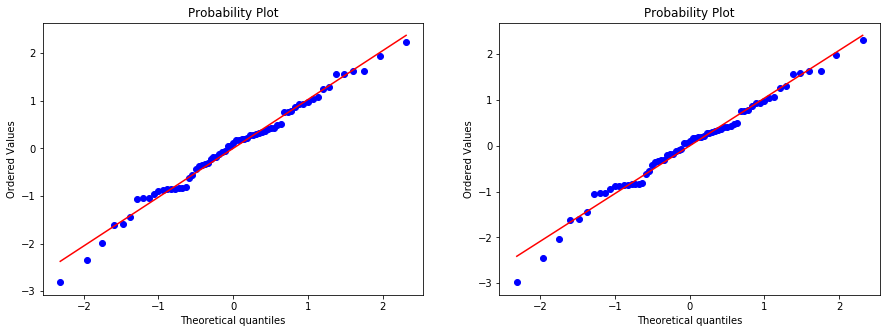

In [37]:
from scipy import stats
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
stats.probplot(np.ravel(rstd_), plot=ax[0])
stats.probplot(np.ravel(rstud_), plot=ax[1])
plt.show()

As can be seen above, both the standardized and studentized residuals seem to follow the normal distribution.

Make a scatterplot of the observations from the dataset in order to have a grasp of your data. Because there are 3 independent variables the forward response plot and the residuals vs. fitted plot will be used. For completeness, we also highlight the "unusual observations" according to the legend in the figure.

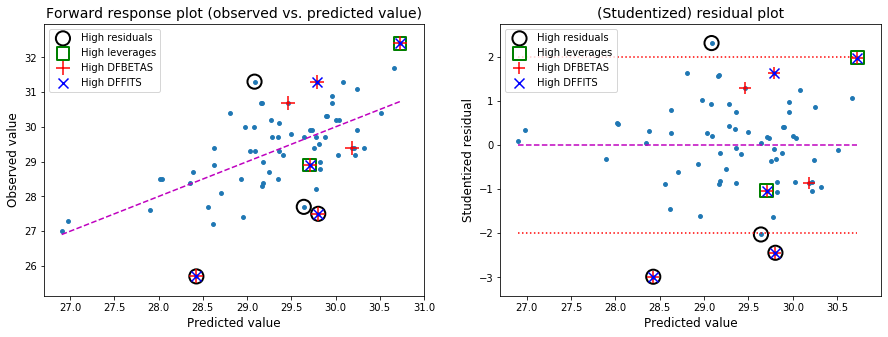

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(yhat_,y_,s=15)
ax[0].scatter(yhat_[idx_R],y_[idx_R],s=200,marker='o',linewidths=2,facecolors='none', edgecolors='k',label='High residuals')
ax[0].scatter(yhat_[idx_X],y_[idx_X],s=160,marker='s',linewidths=2,facecolors='none', edgecolors='g',label='High leverages')
ax[0].scatter(yhat_[idx_B],y_[idx_B],s=200,marker='+',c='r',label='High DFBETAS')
ax[0].scatter(yhat_[idx_F],y_[idx_F],s=100,marker='x',c='b',label='High DFFITS')
ax[0].plot([yhat_.min(),yhat_.max()],[yhat_.min(),yhat_.max()],'m--')
ax[0].set_xlabel('Predicted value',fontsize=12)
ax[0].set_ylabel('Observed value',fontsize=12)
ax[0].set_title('Forward response plot (observed vs. predicted value)',fontsize=14)
ax[0].legend()
ax[1].scatter(yhat_,rstud_,s=15)
ax[1].scatter(yhat_[idx_R],rstud_[idx_R],s=200,marker='o',linewidths=2,facecolors='none', edgecolors='k',label='High residuals')
ax[1].scatter(yhat_[idx_X],rstud_[idx_X],s=160,marker='s',linewidths=2,facecolors='none', edgecolors='g',label='High leverages')
ax[1].scatter(yhat_[idx_B],rstud_[idx_B],s=150,marker='+',c='r',label='High DFBETAS')
ax[1].scatter(yhat_[idx_F],rstud_[idx_F],s=100,marker='x',c='b',label='High DFFITS')
ax[1].plot([yhat_.min(),yhat_.max()],[0,0],'m--')
ax[1].plot([yhat_.min(),yhat_.max()],[-2.0,-2.0],'r:')
ax[1].plot([yhat_.min(),yhat_.max()],[+2.0,+2.0],'r:')
ax[1].set_xlabel('Predicted value',fontsize=12)
ax[1].set_ylabel('Studentized residual',fontsize=12)
ax[1].set_title('(Studentized) residual plot',fontsize=14)
ax[1].legend()
plt.show()

The forward response plot (fitted versus the response scatter plot) shows that the data points are residing along a line so the linear model seems to be a good choice. However, none of the unusual observations can be localized visually, except for the observations with high residuals.

The residual-versus-fitted plot shows that the residuals are scattered randomly around zero, which is again a good sign that the linear model is appropriate. This plot may help to localize visually the observations with high studentized residuals (dotted red lines show the thresholds). From these plots, the high leverage observations cannot be observed with a visual inspection.

To find out observations with both high leverage and high studentized residual, we can create a scatter plot with leverages on the horizontal axis and squared studentized residuals on the vertical axis. Using squared values for the studentized residuals, we limit the observations for the first quadrant. Here we use the orange bubble for the observations with high squared studentized residual and the red rectangle the observations with high leverage. Besides, we can plot the thresholds for leverages and squared studentized residuals as vertical and horizontal dotted red lines to make it more visible the observations passing the thresholds. 

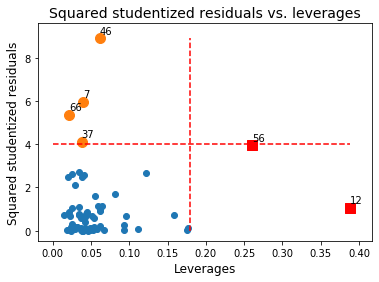

In [39]:
plt.scatter(h_,rstud_**2)
plt.scatter(h_[idx_R],rstud_[idx_R]**2,s=100)
for i in idx_R:
    plt.annotate(i+1, (float(h_[i]),float(rstud_[i]**2)+0.2))
plt.scatter(h_[idx_X],rstud_[idx_X]**2,s=100,c='r',marker='s')
for i in idx_X:
    plt.annotate(i+1, (float(h_[i]),float(rstud_[i]**2)+0.2))
plt.plot([3*levAvg,3*levAvg],[0,(rstud_**2).max()],'r--')
plt.plot([0,h_.max()],[4,4],'r--')
plt.xlabel('Leverages',fontsize=12)
plt.ylabel('Squared studentized residuals',fontsize=12)
plt.title("Squared studentized residuals vs. leverages",fontsize=14)
plt.show()

From this plot, observations with both high leverage and high studentized residuals can be easily picked out. We can observe that observation with index 56 has both high leverage and high studentized residual (squared residual is near the threshold). Thus, it is most probably an influential point. This plot is useful, as the first quadrant is divided further into 4 quadrants, and influential points (observations with both high leverage and high residual) are in the first quadrant. 

We can do a similar plot using graphics of *statsmodels* library. There are two differences however, squared normalized residuals are used instead of studentized residuals, and the axis are interchanged, squared normalized residuals are on the horizontal axis, while leverages are on the vertical axis (indexing starts from zero).  

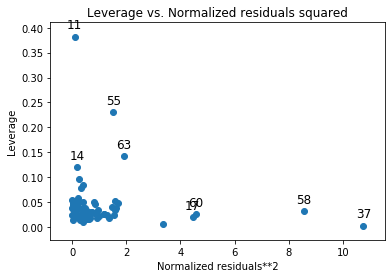

In [40]:
lm = sm.OLS(y_, X).fit()
sm.graphics.plot_leverage_resid2(lm)
plt.show()

As we have seen, it may happen that even in the presence of an outlier, Cook's distance is well below the threshold. Then we can create a plot of Cook's distances vs. the index of the observation, and those observations which have Cook's distance much bigger than the rest of the observation might be outliers.

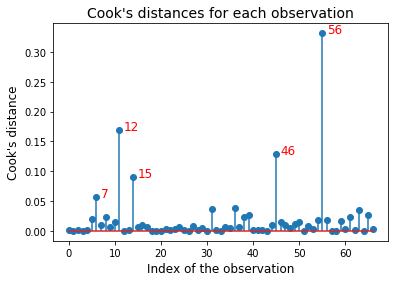

In [41]:
plt.stem(cook_,use_line_collection=True)
plt.xlabel('Index of the observation',fontsize=12)
plt.ylabel("Cook's distance",fontsize=12)
plt.title("Cook's distances for each observation",fontsize=14)
for idx in np.nonzero(cook_>0.05)[0]:
    plt.annotate(str(idx+1),xy=(idx+1,cook_[idx]),color='red',fontsize=12)
plt.show()

We can observe that none of the observations has Cook's distance greater than the threshold, but the highest value has the observation with index 56, and it sticks out from the rest of the distances.

We can also create a so-called influence plot. This kind of scatter plot represents a 2D plot with 3 dimensions, where the 3rd dimension is represented by the size of the bubbles. So, with the leverages on the horizontal axis and studentized residuals on the vertical axis, the bubble size of each observation is proportional to its Cook's distance. The 10 biggest bubbles can be annotated with the index of the observation.

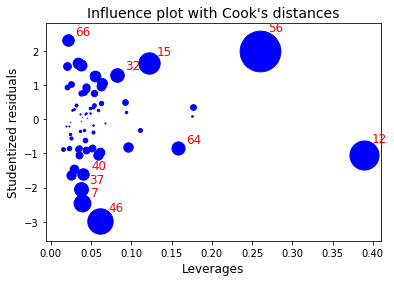

In [42]:
idx=np.argsort(cook_,axis=0)[-10:,0]
for i in range(N):
    plt.scatter(h_[i],rstud_[i],c='b',s=cook_[i]*5000)
    if i in idx:
        plt.annotate(i+1, (float(h_[i])+0.01,float(rstud_[i])+0.1+cook_[i]*1.5),color='red',fontsize=12)
plt.xlabel('Leverages',fontsize=12)
plt.ylabel('Studentized residuals',fontsize=12)
plt.title("Influence plot with Cook's distances",fontsize=14)
plt.show()

As we can see, the observation with the highest bubble, and thus with the highest Cook's distance, is the one having index 56.

We can also do this using the graphics of the *statsmodels* library. Be careful, the indexes start from zero in this case.

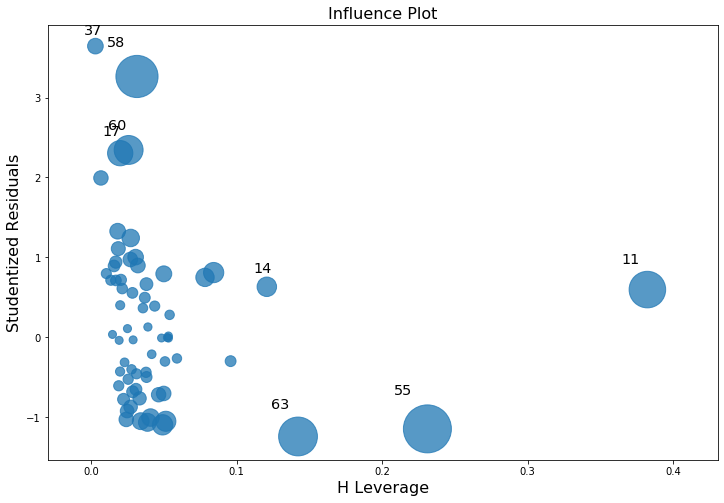

In [43]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm, alpha  = 0.05, ax = ax, criterion="cooks")

Based on the Cook's distance, only observation with index 56 shall be considered an influential point.

## 7. Outlier Masking and Swamping <a name="OutlierMask"></a>

Masking can occur when we are testing for a single outlier when there are, in fact, two (or more) outliers, and these additional outliers may influence our test results in the way that no outlier is found. On the other hand, swamping can occur when we specify too many outliers in the test, and observations that may not be outliers are also considered as outliers.

Let's check the Star cluster dataset again, which we analyzed in Chapter 2, Exercise 4. With graphical analysis, we concluded that there are 4 outliers. Let's see if we can identify all 4 outliers using the techniques defined for MLR.

In [44]:
dataStar = pd.read_csv(os.path.join('data','StarClusterCYGOB1.csv'))
dataStar=dataStar.rename(columns={"Log surface termperature of the star": "LogSurfTemp",\
                                  "Log light intensity of the star":"LogLightIntensity"})
dataStar

,Index,LogSurfTemp,LogLightIntensity
0,1,4.37,5.23
1,2,4.56,5.74
2,3,4.26,4.93
3,4,4.56,5.74
4,5,4.30,5.19
5,6,4.46,5.46
6,7,3.84,4.65
7,8,4.57,5.27
8,9,4.26,5.57
9,10,4.37,5.12


In Chapter 2, Exercise 4, we localized the influential points, and they are residing on the top left of the scatter plot. 

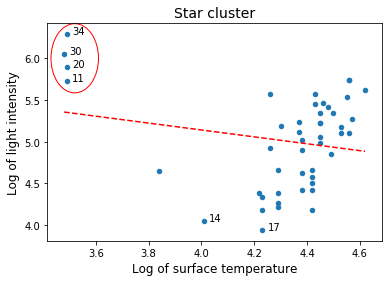

In [45]:
from matplotlib.patches import Ellipse

N=np.array(dataStar['LogSurfTemp']).shape[0]
X=np.array(dataStar['LogSurfTemp'])[:,np.newaxis]
Xdot=np.insert(X,0,np.ones(N),axis=1)
y_=np.array(dataStar['LogLightIntensity'])[:,np.newaxis]
w_=inv(Xdot.T@Xdot)@Xdot.T@y_

dataStar.plot.scatter(y='LogLightIntensity',x='LogSurfTemp')
plt.title('Star cluster',fontsize=14)
plt.xlabel('Log of surface temperature',fontsize=12)
plt.ylabel('Log of light intensity',fontsize=12)
plt.gca().add_artist(Ellipse(xy=(3.52,6.0), width=0.18, height=0.83, edgecolor='r', fc='None', lw=1))
for i in dataStar[dataStar['LogSurfTemp']<3.5].index:
    plt.annotate(str(i+1),(dataStar.iloc[i]['LogSurfTemp'],dataStar.iloc[i]['LogLightIntensity']),\
                 (dataStar.iloc[i]['LogSurfTemp']+0.02,dataStar.iloc[i]['LogLightIntensity']))
for i in [13,16]:
    plt.annotate(str(i+1),(dataStar.iloc[i]['LogSurfTemp'],dataStar.iloc[i]['LogLightIntensity']),\
                 (dataStar.iloc[i]['LogSurfTemp']+0.02,dataStar.iloc[i]['LogLightIntensity']))
plt.plot([X.min(),X.max()],[w_[0,0]+w_[1,0]*X.min(),w_[0,0]+w_[1,0]*X.max()],'r--')
plt.show()

From the visual inspection of the dataset, we know that the influential points are those for which have $x<3.5$. So let's print them out.

In [46]:
print('Outliers in Star Cluster data:\n')
print(dataStar[dataStar['LogSurfTemp']<3.5])

Outliers in Star Cluster data:

    Index  LogSurfTemp  LogLightIntensity
10     11         3.49               5.73
19     20         3.49               5.89
29     30         3.48               6.05
33     34         3.49               6.29


Fit the regression model using all observations.

In [47]:
resultStar = ols(formula = 'LogLightIntensity ~ LogSurfTemp', data=dataStar).fit()
print(resultStar.summary())
print("\nRMSE =",np.sqrt(resultStar.mse_resid))

                            OLS Regression Results                            
Dep. Variable:      LogLightIntensity   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.085
Date:                Tue, 07 Apr 2020   Prob (F-statistic):              0.156
Time:                        17:45:47   Log-Likelihood:                -38.804
No. Observations:                  47   AIC:                             81.61
Df Residuals:                      45   BIC:                             85.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.7935      1.237      5.494      

The adjusted R-squared is nearly zero. The p-value of the F-statistic also shows that we cannot reject the null hypothesis that at least one regression coefficient is not zero, i.e., all are zero. So our model is not different from a model taking the average of the response variable. Thus, the linear model is not useful, even if the RMSE value is small.

Let's find the observations with both high leverage and high studentized residuals:

In [48]:
h_=resultStar.get_influence().summary_frame()['hat_diag'].to_numpy()
levAvg=h_.mean()
idx_X=np.nonzero(h_>3*levAvg)[0]
print("Index of observations with high leverages:",idx_X+1)
rstud_=resultStar.get_influence().resid_studentized_external
idx_R=np.nonzero(np.abs(rstud_)>2.0)[0]
print("Index of observations with high studentized residuals:",idx_R+1)

Index of observations with high leverages: [11 20 30 34]
Index of observations with high studentized residuals: [14 17]


We can observe, that while all influential points have high leverage, none of them has high studentized residual. When it comes to high residuals this is a good example for both the outlier masking and swamping effect.

Let's check influential points graphically using the squared studentized residuals vs. leverage.

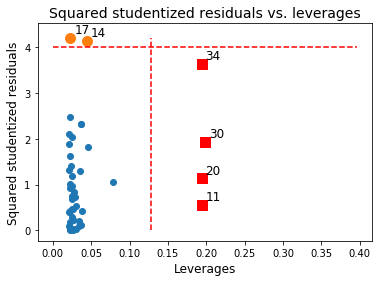

In [49]:
plt.scatter(h_,rstud_**2)
plt.scatter(h_[idx_R],rstud_[idx_R]**2,s=100)
for i in idx_R:
    plt.annotate(i+1, (float(h_[i]),float(rstud_[i]**2)),(float(h_[i])+0.005,float(rstud_[i]**2)+0.1),fontsize=12)
plt.scatter(h_[idx_X],rstud_[idx_X]**2,s=100,c='r',marker='s')
for i in idx_X:
    plt.annotate(i+1, (float(h_[i]),float(rstud_[i]**2)),(float(h_[i])+0.005,float(rstud_[i]**2)+0.1),fontsize=12)
plt.plot([3*levAvg,3*levAvg],[0,(rstud_**2).max()],'r--')
plt.plot([0,2*h_.max()],[4,4],'r--')
plt.xlabel('Leverages',fontsize=12)
plt.ylabel('Squared studentized residuals',fontsize=12)
plt.title("Squared studentized residuals vs. leverages",fontsize=14)
plt.show()

It can be observed that, although the 4 influential points have extremely high studentized residuals, the leverages are below the threshold for all, except for one (observation 34). But even that one is close to the threshold. The reason is that the outliers "pull" the centroid of the data toward themselves, which results in lower Mahalanobis distances - and thus lower leverages - between the outliers and data center. 

Now check the DFFITS, DFBETAS:

In [50]:
dffits_,dffits_threshold=resultStar.get_influence().dffits
print("Threshold for DFFITS =", dffits_threshold)
idx_F=np.nonzero(np.abs(dffits_)>dffits_threshold)[0]
print("Observation indexes which DFFITS value exceeding the threshold:\n",idx_F+1)
print()
DFBETAS=resultStar.get_influence().dfbetas
dfbetas_threshold=2/np.sqrt(N)
print("Threshold for DFBETAS =",dfbetas_threshold)
idx_B,idx_w=np.nonzero(np.abs(DFBETAS)>dfbetas_threshold)
print("DFBETAS exceeding the threshold (first index - observation number, second index - index of regression coefficient):")
for i,j in zip(idx_B,idx_w):
    print(i+1,j+1)

Threshold for DFFITS = 0.41256849850351734
Observation indexes which DFFITS value exceeding the threshold:
 [14 20 30 34]

Threshold for DFBETAS = 0.2917299829957891
DFBETAS exceeding the threshold (first index - observation number, second index - index of regression coefficient):
11 1
11 2
14 1
14 2
20 1
20 2
30 1
30 2
34 1
34 2


It can be observed that DFFITS finds only three real outliers, while DFBETAS found all 4 outliers, but both of them erronusly flagged observation 14 as an outlier. This is again, the outlier swamping effect. In case of DFFITS we also have the outlier masking effect.

Finally, check the Cook's distances:

In [51]:
cook_,pval_=resultStar.get_influence().cooks_distance
cook_threshold=stats.f.sf(0.5,D+1,N-D-1)
print("Threshold for Cook's distance =",cook_threshold)
idx_C=np.nonzero(cook_>cook_threshold)[0]
print("Observation indexes which Cook's distance exceeding the threshold:\n",idx_C+1)

Threshold for Cook's distance = 0.7358222350119112
Observation indexes which Cook's distance exceeding the threshold:
 []


None of the Cook's distances exceed the threshold. Let's make a summary of our findings:

In [52]:
print("Unusual observations:")
print("===============================================================================")
df=pd.DataFrame(columns=['Index','LogSurfTemp','LogLightIntense',"Cook's dist.",'Type','Note'])
idx=np.sort(np.append(idx_X,idx_R))
idx=np.sort(np.append(idx,idx_B))
idx=np.sort(np.append(idx,idx_F))
idx=np.sort(np.append(idx,idx_C))
idx=np.unique(idx)

for i in idx:
    df.loc[i]=[i+1,dataStar.iloc[i]['LogSurfTemp'],dataStar.iloc[i]['LogLightIntensity'],cook_[i],outliertype(i),\
               ['w_'+str(idx_w[i]) for i in list(np.ravel(np.argwhere(i==idx_B)))]]
df['Index']=df['Index'].astype(int)
print(df.to_string(index=False))
print('_______________________________________________________________________________')
print("Means:         %3.1f              %3.2f      %1.6f"%\
      (dataStar['LogSurfTemp'].mean(),dataStar['LogLightIntensity'].mean(),cook_.mean()))

Unusual observations:
 Index  LogSurfTemp  LogLightIntense  Cook's dist.       Type        Note
    11         3.49             5.73      0.067314     [X, B]  [w_0, w_1]
    14         4.01             4.05      0.089975  [R, B, F]  [w_0, w_1]
    17         4.23             3.94      0.045994        [R]          []
    20         3.49             5.89      0.136155  [X, B, F]  [w_0, w_1]
    30         3.48             6.05      0.233691  [X, B, F]  [w_0, w_1]
    34         3.49             6.29      0.413249  [X, B, F]  [w_0, w_1]
_______________________________________________________________________________
Means:         4.3              5.01      0.031562


As we can observe, none of the tests are 'silver bullet'. In this particular dataset, DFFITS and DFBETAS suffer of the swamping effect, while DFFITS and studentized residuals suffer of the masking effect. So, we have to rely on graphical analysis, as well.

Let's analyze graphically the Cook's distances:

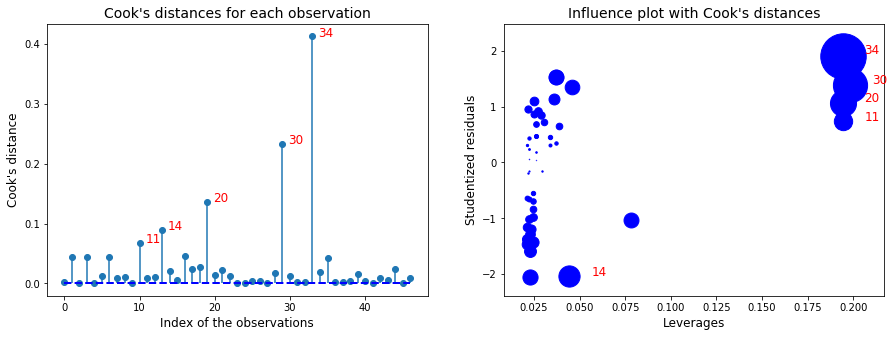

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
idx=np.argsort(cook_)[::-1][:5]
(markerLines, stemLines, baseLines) = ax[0].stem(cook_,use_line_collection=True)
plt.setp(baseLines, color = 'blue', linewidth = 2, linestyle  = 'dashed')
for i in idx:
    ax[0].annotate(i+1,(i,cook_[i]),(i+0.8,cook_[i]),color='red',fontsize=12)
ax[0].set_xlabel('Index of the observations',fontsize=12)
ax[0].set_ylabel("Cook's distance",fontsize=12)
ax[0].set_title("Cook's distances for each observation",fontsize=14)

for i in range(N):
    ax[1].scatter(h_[i],rstud_[i],c='b',s=cook_[i]*5000)
    if i in idx:
        ax[1].annotate(i+1, (float(h_[i])+0.012,float(rstud_[i])+0.1*cook_[i]),color='red',fontsize=12)
ax[1].set_xlabel('Leverages',fontsize=12)
ax[1].set_ylabel('Studentized residuals',fontsize=12)
ax[1].set_title("Influence plot with Cook's distances",fontsize=14)
plt.show()

From the Cook's distances, while we might be sure that observation 34 should be a real outlier, and we might also point to observation 30 as an outlier, for the rest we cannot state with certainty that these are real outliers (in fact for observation 14 we know from the 2D scatter plot that is not).

We can conclude that the graphical analysis is more an art than a science, and you should use both your common sense, as well as, the domain knowledge to make the right decision. And finding a group of outliers in a multidimensional space (when the number of input variables are above 2) is really hard.

## 8. Modified z-score <a name="ModZscore"></a>

As we have seen before, the leverages are proportional to the Mahalanobis distances. On the other hand, when D=1, the Mahalanobis distance is the z-score. So let's check for which observation we have z-score above 3 (3 sigma distance from the center).

In [54]:
np.nonzero(np.array(abs((dataStar['LogSurfTemp']-dataStar['LogSurfTemp'].mean())/dataStar['LogSurfTemp'].std()))>3)[0]

array([], dtype=int64)

None of the outliers can be found because the center of the data and the spread of the data is greatly influenced by the 4 outliers, so the z-score is not able to catch them (masking effect).

Because the multiple outliers pull the regression line toward them and thus, decrease their distance from the center, we might try to use a different test, which is more robust to outliers. As we saw earlier, the median is more robust to extreme values than the mean. So we can use the modified z-score proposed by Iglewicz and Hoaglin where the center of the input is estimated with the median and the spread of the input with MAD (median absolute deviation).

In [55]:
mad=np.median(abs(dataStar['LogSurfTemp']-dataStar['LogSurfTemp'].median()))
if mad == 0:
    mad = 1e-308
z_=np.array(abs(0.6745*(dataStar['LogSurfTemp']-dataStar['LogSurfTemp'].median())/mad))[:,np.newaxis]
idx_X=np.nonzero(z_>3.5)[0]
print(idx_X+1)

[ 7 11 20 30 34]


As can be seen, 5 observations are marked as outliers in the x-direction. Thus, we have the swamping effect again. In this particular dataset, the modified z-score fails to correctly identify the true outliers.

<img src = "images/AML1-Cover.png" width = 90, align = "left" style="margin:0px 20px">

**Note:** This Jupyter Notebook is accompanying the book: <br><i>"Machine Learning - From Theory to Practice with NumPy and scikit-learn, Volume 1: Generalized Linear Models"</i><br>
by Ferenc Farkas, Ph.D. 

If you find this Notebook useful, please support me by buying the book at [Leanpub](http://leanpub.com/AML1). <br>
Copyright notice: This Jupyter Notebook is made available under the [MIT License](https://opensource.org/licenses/MIT).